In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Criando o conjunto de dados
data = pd.DataFrame({
    'Potencia_kW': [120, 80, 100, 110, 90, 130, 70, 105, 115, 85],
    'Eficiencia_%': [92, 65, 75, 85, 68, 95, 60, 80, 88, 70],
    'Idade_anos': [3, 8, 5, 4, 7, 2, 10, 6, 3, 9],
    'Tamanho_m2': [50, 45, 55, 60, 48, 62, 40, 58, 56, 47],
    'Consumo_Energia': ['Eficiente', 'Ineficiente', 'Ineficiente', 'Eficiente', 
                        'Ineficiente', 'Eficiente', 'Ineficiente', 'Eficiente', 
                        'Eficiente', 'Ineficiente']
})

data.head()

,Potencia_kW,Eficiencia_%,Idade_anos,Tamanho_m2,Consumo_Energia
0,120,92,3,50,Eficiente
1,80,65,8,45,Ineficiente
2,100,75,5,55,Ineficiente
3,110,85,4,60,Eficiente
4,90,68,7,48,Ineficiente


In [4]:
# Separando características (X) e rótulo (y)
X = data[['Potencia_kW', 'Eficiencia_%', 'Idade_anos', 'Tamanho_m2']]
y = data['Consumo_Energia']

print("Shape de X:", X.shape)
print("Shape de y:", y.shape)

Shape de X: (10, 4)
Shape de y: (10,)


In [5]:
# Dividindo em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Tamanho do conjunto de treino: {len(X_train)}")
print(f"Tamanho do conjunto de teste: {len(X_test)}")

Tamanho do conjunto de treino: 7
Tamanho do conjunto de teste: 3


In [6]:
# Padronização dos dados (importante para SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Dados padronizados com sucesso!")

Dados padronizados com sucesso!


In [7]:
# Treinando o modelo SVM
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

print("Modelo treinado com sucesso!")

Modelo treinado com sucesso!


In [8]:
# Fazendo previsões
y_pred = svm_model.predict(X_test)

print("Previsões:", y_pred)
print("Valores reais:", y_test.values)

Previsões: ['Eficiente' 'Ineficiente' 'Eficiente']
Valores reais: ['Eficiente' 'Ineficiente' 'Eficiente']


In [9]:
# Avaliando o modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do Modelo SVM: {accuracy:.2f}')
print('\nRelatório de Classificação:')
print(classification_report(y_test, y_pred))

Acurácia do Modelo SVM: 1.00

Relatório de Classificação:
              precision    recall  f1-score   support

   Eficiente       1.00      1.00      1.00         2
 Ineficiente       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



Matriz de Confusão:
[[2 0]
 [0 1]]


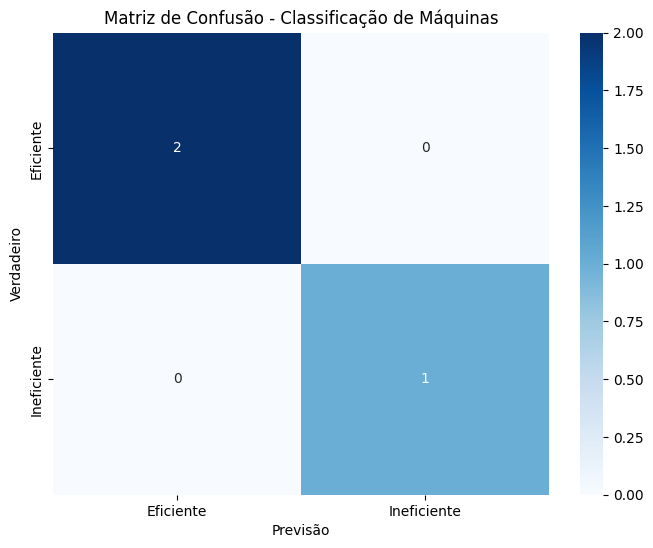

In [10]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
print('Matriz de Confusão:')
print(cm)

# Plotando a matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Eficiente', 'Ineficiente'], 
            yticklabels=['Eficiente', 'Ineficiente'])
plt.xlabel('Previsão')
plt.ylabel('Verdadeiro')
plt.title('Matriz de Confusão - Classificação de Máquinas')
plt.show()